In [771]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

Top 10 influncers for each category

In [772]:
user = pd.read_csv(r'User.csv')
content = pd.read_csv(r'Content.csv')
reaction = pd.read_csv(r'Reactions.csv')
reaction_type = pd.read_csv(r'ReactionTypes.csv')

In [773]:
user.drop(columns=['Unnamed: 0', 'Email'], inplace=True)
content.drop(columns=['Unnamed: 0', 'URL', 'Type'], inplace=True)
reaction.drop(columns=['Unnamed: 0', 'Datetime'], inplace=True)
reaction_type.drop(columns=['Unnamed: 0'], inplace=True)

In [774]:
# fix the category column in the content dataset
content.Category = content.Category.str.replace('"', '')
content.Category = content.Category.str.lower()

In [775]:
reaction_type.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [776]:
df = user.merge(content, how='inner', on='User ID')
df = df.merge(reaction, how='inner', on='User ID')
df = df.rename(columns={'Type_x': 'Cont_Type', 'Type_y': 'Type'})
df = df.merge(reaction_type, how='inner', on='Type')
df.drop(columns=['User ID', 'Content ID_x', 'Content ID_y', 'Type'], inplace=True)

In [777]:
df.drop_duplicates(inplace=True)

In [779]:
# df.to_csv('cleaned.csv', index=False)

In [781]:
# Filter the data for negative sentiments
df = df[df['Sentiment'] != 'neutral']

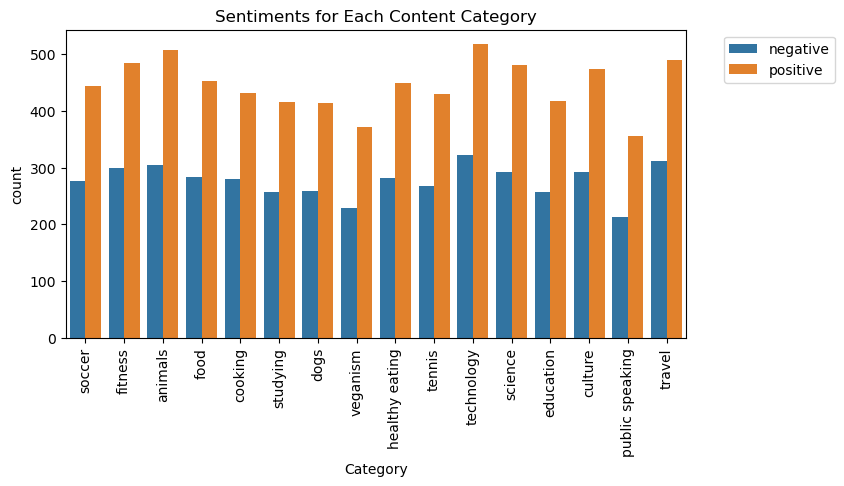

In [782]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Category', hue='Sentiment', data=df)
plt.title('Sentiments for Each Content Category')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [783]:
# Count the number of negative and positive sentiments for each category
sentiment_counts = df.groupby(
    ['Category', 'Sentiment']).size().unstack(fill_value=0)

# Calculate the ratio of negative to positive sentiments
sentiment_counts['negative_to_positive_ratio'] = sentiment_counts['negative'] / \
    sentiment_counts['positive']

# Display the result
print(sentiment_counts)

Sentiment        negative  positive  negative_to_positive_ratio
Category                                                       
animals               305       507                    0.601578
cooking               279       432                    0.645833
culture               292       473                    0.617336
dogs                  259       413                    0.627119
education             257       418                    0.614833
fitness               300       484                    0.619835
food                  283       452                    0.626106
healthy eating        282       449                    0.628062
public speaking       212       356                    0.595506
science               292       481                    0.607069
soccer                276       444                    0.621622
studying              256       415                    0.616867
technology            322       517                    0.622824
tennis                268       429     

In [785]:
# sentiment_counts.to_csv('sentiment.csv', index=False)

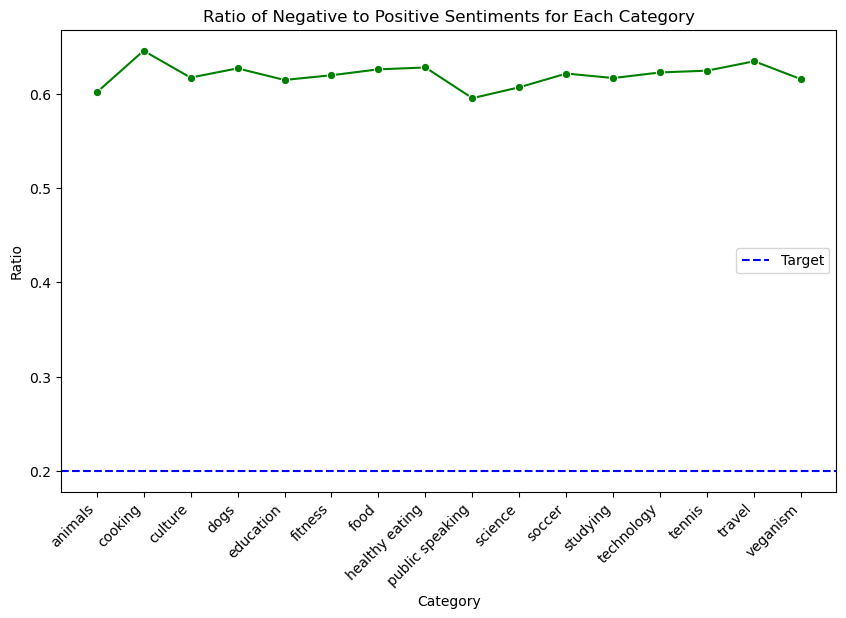

In [786]:
# Reset index for plotting
sentiment_counts = sentiment_counts.reset_index()

# Plot the ratio using seaborn as a line chart
plt.figure(figsize=(10, 6))
plt.axhline(y=0.2, color='blue', linestyle='--', label='Target')
sns.lineplot(x='Category', y='negative_to_positive_ratio',
             marker='o', data=sentiment_counts, color='green')
plt.title('Ratio of Negative to Positive Sentiments for Each Category')
plt.xlabel('Category')
plt.ylabel('Ratio')
plt.xticks(rotation=45, ha='right')
plt.show()